In [ ]:
import pandas as pd
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
import plotly.graph_objs as go
import plotly.io as pio
import io
import matplotlib.pyplot as plt

In [ ]:
import warnings
warnings.filterwarnings("ignore")

##  **Data Understanding**

In [ ]:
df = pd.read_csv("/content/Bitcoin Historical Data (1).csv")
print("Top rows:")
df.head()

Top rows:


,Date,Price,Open,High,Low,Vol.,Change %
0,03/24/2024,"67,211.9","64,036.5","67,587.8","63,812.9",65.59K,4.96%
1,03/23/2024,"64,037.8","63,785.6","65,972.4","63,074.9",35.11K,0.40%
2,03/22/2024,"63,785.5","65,501.5","66,633.3","62,328.3",72.43K,-2.62%
3,03/21/2024,"65,503.8","67,860.0","68,161.7","64,616.1",75.26K,-3.46%
4,03/20/2024,"67,854.0","62,046.8","68,029.5","60,850.9",133.53K,9.35%


In [ ]:
print("Bottom rows:")
df.tail()

Bottom rows:


,Date,Price,Open,High,Low,Vol.,Change %
4994,07/22/2010,0.1,0.1,0.1,0.1,2.16K,0.00%
4995,07/21/2010,0.1,0.1,0.1,0.1,0.58K,0.00%
4996,07/20/2010,0.1,0.1,0.1,0.1,0.26K,0.00%
4997,07/19/2010,0.1,0.1,0.1,0.1,0.57K,0.00%
4998,07/18/2010,0.1,0.0,0.1,0.1,0.08K,0.00%


In [ ]:
df_candlestick = df[['Date', 'Open', 'High', 'Low', 'Price']]

# 7. Plot candlestick chart using Plotly
fig = go.Figure(data=[go.Candlestick(
    x=df_candlestick['Date'],
    open=df_candlestick['Open'],
    high=df_candlestick['High'],
    low=df_candlestick['Low'],
    close=df_candlestick['Price']
)])

fig.update_layout(
    title='Candlestick Chart',
    xaxis_title='Date',
    yaxis_title='Price',
    xaxis_rangeslider_visible=False
)

# Display the plot
pio.show(fig)

###  Acccording to the above graph, We can observe that this data set in reverse order, so we have to make it correct during the pre-processing

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4999 entries, 0 to 4998
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Date      4999 non-null   object
 1   Price     4999 non-null   object
 2   Open      4999 non-null   object
 3   High      4999 non-null   object
 4   Low       4999 non-null   object
 5   Vol.      4993 non-null   object
 6   Change %  4999 non-null   object
dtypes: object(7)
memory usage: 273.5+ KB


In [ ]:
df.describe()

,Date,Price,Open,High,Low,Vol.,Change %
count,4999,4999,4999,4999,4999,4993,4999
unique,4999,4044,4037,4032,4041,4423,1550
top,03/24/2024,0.1,0.1,0.1,0.1,1.05M,0.00%
freq,1,100,100,97,101,6,429


# **Satge 01 : Data Preprocessing & EDA**

In [ ]:
print('Total number of days present in the dataset: ',df.shape[0])
print('Total number of fields present in the dataset: ',df.shape[1])

Total number of days present in the dataset:  4999
Total number of fields present in the dataset:  7


### **1.1. Sort the data from earliest day to last day**

In [ ]:
df['Date'] = pd.to_datetime(df['Date'], format='%m/%d/%Y')
df = df.sort_values('Date').reset_index(drop=True)
print("Top rows:")
df.head()


Top rows:


,Date,Price,Open,High,Low,Vol.,Change %
0,2010-07-18,0.1,0.0,0.1,0.1,0.08K,0.00%
1,2010-07-19,0.1,0.1,0.1,0.1,0.57K,0.00%
2,2010-07-20,0.1,0.1,0.1,0.1,0.26K,0.00%
3,2010-07-21,0.1,0.1,0.1,0.1,0.58K,0.00%
4,2010-07-22,0.1,0.1,0.1,0.1,2.16K,0.00%


In [ ]:
print("\nBottom rows:")
df.tail()


Bottom rows:


,Date,Price,Open,High,Low,Vol.,Change %
4994,2024-03-20,"67,854.0","62,046.8","68,029.5","60,850.9",133.53K,9.35%
4995,2024-03-21,"65,503.8","67,860.0","68,161.7","64,616.1",75.26K,-3.46%
4996,2024-03-22,"63,785.5","65,501.5","66,633.3","62,328.3",72.43K,-2.62%
4997,2024-03-23,"64,037.8","63,785.6","65,972.4","63,074.9",35.11K,0.40%
4998,2024-03-24,"67,211.9","64,036.5","67,587.8","63,812.9",65.59K,4.96%


### **1.2. Cleaning Data Formating errors**

In [ ]:
# Remove %, K, and , from the values in all columns
df.replace({',': '', 'K': 'e3', 'M': 'e6', 'B': 'e9', '%': ''}, regex=True, inplace=True)
df['Vol.'] = df['Vol.'].astype(float)  # Convert to float for scaling

# Convert 'Date' column to datetime format
df['Date'] = pd.to_datetime(df['Date'], format='%m/%d/%Y')

df.head()


,Date,Price,Open,High,Low,Vol.,Change %
0,2010-07-18,0.1,0.0,0.1,0.1,80.0,0.00
1,2010-07-19,0.1,0.1,0.1,0.1,570.0,0.00
2,2010-07-20,0.1,0.1,0.1,0.1,260.0,0.00
3,2010-07-21,0.1,0.1,0.1,0.1,580.0,0.00
4,2010-07-22,0.1,0.1,0.1,0.1,2160.0,0.00


### **1.3. Handling Missing Values**

In [ ]:
# Check for null values
null_values = df.isnull().sum()

print("missing values in each column:")
print(null_values)

missing values in each column:
Date        0
Price       0
Open        0
High        0
Low         0
Vol.        6
Change %    0
dtype: int64


### We can observe that 6 missing values are present in the dataset, Since this is time sereis data , we will do not remove those missing value's rows, insted we impute them using interpolation technique

In [ ]:
# Interpolate missing values in the 'Vol.' column
df['Vol.'] = df['Vol.'].interpolate()

# Check for null values after interpolation
null_values = df.isnull().sum()
print("Missing values in each column after interpolation:")
print(null_values)


Missing values in each column after interpolation:
Date        0
Price       0
Open        0
High        0
Low         0
Vol.        0
Change %    0
dtype: int64


### **Explonatary Data Analysis :**

In [ ]:
# Printing the start date and End date of the dataset

sd=df.iloc[0][0]
ed=df.iloc[-1][0]
print('Starting Date',sd)
print('Ending Date',ed)

#Convert 'Date' column to datetime format
df['Date'] = pd.to_datetime(df['Date'], format='%m/%d/%Y')

# Filter the DataFrame for the specified date range
y_avg = df.loc[(df['Date'] >= '2010-08-01') & (df['Date'] < '2024-04-08')]

# Select only the 'Date', 'Price', and 'Vol.' columns
y_filtered = y_avg[['Date', 'Price', 'Vol.']]

# Display the filtered DataFrame
print(y_filtered)

Starting Date 2010-07-18 00:00:00
Ending Date 2024-03-24 00:00:00
           Date    Price      Vol.
14   2010-08-01      0.1    2600.0
15   2010-08-02      0.1    3600.0
16   2010-08-03      0.1    9820.0
17   2010-08-04      0.1    3490.0
18   2010-08-05      0.1    5030.0
...         ...      ...       ...
4994 2024-03-20  67854.0  133530.0
4995 2024-03-21  65503.8   75260.0
4996 2024-03-22  63785.5   72430.0
4997 2024-03-23  64037.8   35110.0
4998 2024-03-24  67211.9   65590.0

[4985 rows x 3 columns]


           Date      Vol.  Year
14   2010-08-01    2600.0  2010
15   2010-08-02    3600.0  2010
16   2010-08-03    9820.0  2010
17   2010-08-04    3490.0  2010
18   2010-08-05    5030.0  2010
...         ...       ...   ...
4994 2024-03-20  133530.0  2024
4995 2024-03-21   75260.0  2024
4996 2024-03-22   72430.0  2024
4997 2024-03-23   35110.0  2024
4998 2024-03-24   65590.0  2024

[4985 rows x 3 columns]


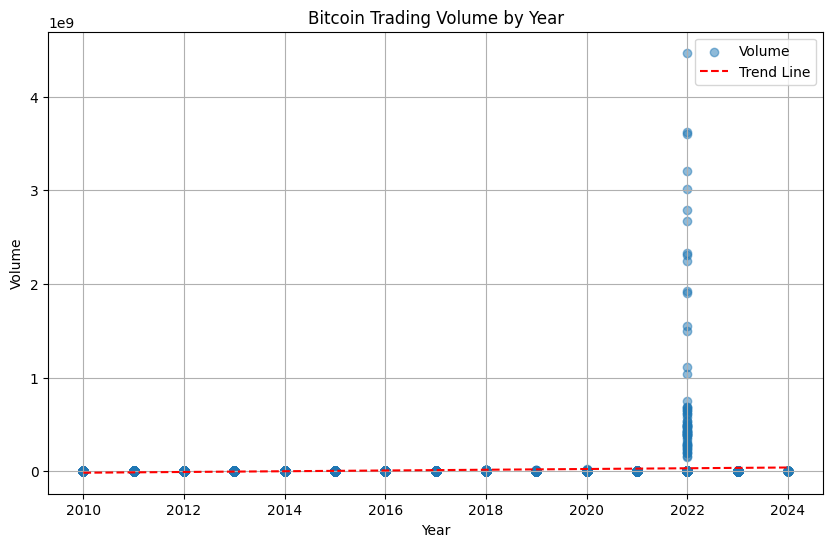

In [ ]:
# Bitcoin Trading Volume by Year

y_filtered = y_avg[['Date', 'Vol.']]
y_filtered['Year'] = y_filtered['Date'].dt.year

print(y_filtered)

plt.figure(figsize=(10, 6))
plt.scatter(y_filtered['Year'], y_filtered['Vol.'], alpha=0.5, label='Volume')

z = np.polyfit(y_filtered['Year'], y_filtered['Vol.'], 1)
p = np.poly1d(z)
plt.plot(y_filtered['Year'], p(y_filtered['Year']), "r--", label='Trend Line')

plt.title('Bitcoin Trading Volume by Year')
plt.xlabel('Year')
plt.ylabel('Volume')
plt.grid(True)
plt.legend()
plt.show()

In [ ]:
# Convert 'Price' and 'Open' columns to numeric, coerce errors to NaN
y_avg[['Price', 'Open']] = y_avg[['Price', 'Open']].apply(pd.to_numeric, errors='coerce')

# Drop rows with NaN values
y_avg.dropna(subset=['Price', 'Open'], inplace=True)

# Group by month and calculate the mean
monthwise = y_avg.groupby(y_avg['Date'].dt.strftime('%B'))[['Open', 'Price']].mean()

# Reorder months
new_order = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August',
             'September', 'October', 'November', 'December']
monthwise = monthwise.reindex(new_order, axis=0)
monthwise

,Open,Price
Date,,
January,11893.089171,11897.480415
February,13155.830303,13244.235859
March,14176.259485,14228.429742
April,11559.568718,11553.771795
May,10354.430025,10292.366749
June,9093.131026,9068.183333
July,9018.264764,9046.390323
August,9303.808525,9303.721429
September,8913.012619,8898.603333


In [ ]:
# Monthwise comparision "2010-2024" Average between Bitcoin open and close price
fig = go.Figure()

fig.add_trace(go.Bar(
    x=monthwise.index,
    y=monthwise['Open'],
    name='Bitcoin Open Price',
    marker_color='crimson'
))
fig.add_trace(go.Bar(
    x=monthwise.index,
    y=monthwise['Price'],
    name='Bitcoin Close Price',
    marker_color='lightsalmon'
))

fig.update_layout(barmode='group', xaxis_tickangle=-45,
                  title='Monthwise comparision "2010-2024" Average between Bitcoin open and close price')
fig.show()

In [ ]:
#'Monthwise Comparison of Bitcoin Open and Close Prices (2010-2024)

fig = go.Figure()

fig.add_trace(go.Scatter(
    x=monthwise.index,
    y=monthwise['Open'],
    mode='lines+markers',
    name='Bitcoin Open Price',
    line=dict(color='crimson', width=2)
))
fig.add_trace(go.Scatter(
    x=monthwise.index,
    y=monthwise['Price'],
    mode='lines+markers',
    name='Bitcoin Close Price',
    line=dict(color='lightsalmon', width=2)
))

fig.update_layout(
    title='Monthwise Comparison of Bitcoin Open and Close Prices (2010-2024)',
    xaxis=dict(title='Month'),
    yaxis=dict(title='Price'),
    legend=dict(title='Price Type'),
    hovermode='x unified'
)

fig.show()

In [ ]:
#Price Comparison Over Time
import plotly.graph_objs as go

trace_price = go.Scatter(
    x=y_avg['Date'],
    y=y_avg['Price'],
    mode='lines',
    name='Price'
)

data = [trace_price]


layout = go.Layout(
    title='Price Comparison Over Time',
    xaxis=dict(title='Date'),
    yaxis=dict(title='Value')
)

fig = go.Figure(data=data, layout=layout)

fig.show()

In [ ]:
df_candlestick = df[['Date', 'Open', 'High', 'Low', 'Price']]

# 7. Plot candlestick chart using Plotly
fig = go.Figure(data=[go.Candlestick(
    x=df_candlestick['Date'],
    open=df_candlestick['Open'],
    high=df_candlestick['High'],
    low=df_candlestick['Low'],
    close=df_candlestick['Price']
)])

fig.update_layout(
    title='Candlestick Chart',
    xaxis_title='Date',
    yaxis_title='Price',
    xaxis_rangeslider_visible=False
)

# Display the plot
pio.show(fig)

     YearMonth          Vol.
0   2010-08-01   7151.935484
1   2010-09-01   7227.666667
2   2010-10-01  35676.129032
3   2010-11-01  27542.333333
4   2010-12-01   8505.483871
..         ...           ...
159 2023-11-01  48870.000000
160 2023-12-01  52704.193548
161 2024-01-01  65466.774194
162 2024-02-01  57919.310345
163 2024-03-01  90935.416667

[164 rows x 2 columns]


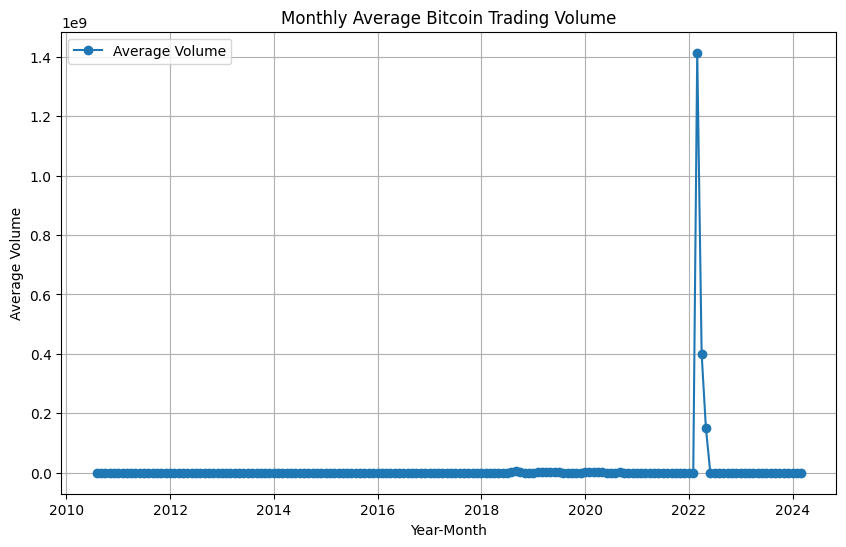

In [ ]:
# Monthly Average Bitcoin Trading Volume

y_filtered['YearMonth'] = y_filtered['Date'].dt.to_period('M')
# Calculate the monthly average trading volume
monthly_avg = y_filtered.groupby('YearMonth')['Vol.'].mean().reset_index()
monthly_avg['YearMonth'] = monthly_avg['YearMonth'].dt.to_timestamp()
# Display the monthly average DataFrame
print(monthly_avg)

# Plot the monthly average trading volume
plt.figure(figsize=(10, 6))
plt.plot(monthly_avg['YearMonth'], monthly_avg['Vol.'], marker='o', linestyle='-', label='Average Volume')

plt.title('Monthly Average Bitcoin Trading Volume')
plt.xlabel('Year-Month')
plt.ylabel('Average Volume')
plt.grid(True)
plt.legend()
plt.show()

    Month          Vol.
0       1  1.705267e+05
1       2  2.084421e+05
2       3  1.030042e+08
3       4  3.108680e+07
4       5  1.185465e+07
5       6  1.682441e+05
6       7  1.609336e+05
7       8  2.714124e+05
8       9  6.574784e+05
9      10  2.416609e+05
10     11  1.494293e+05
11     12  1.499237e+05


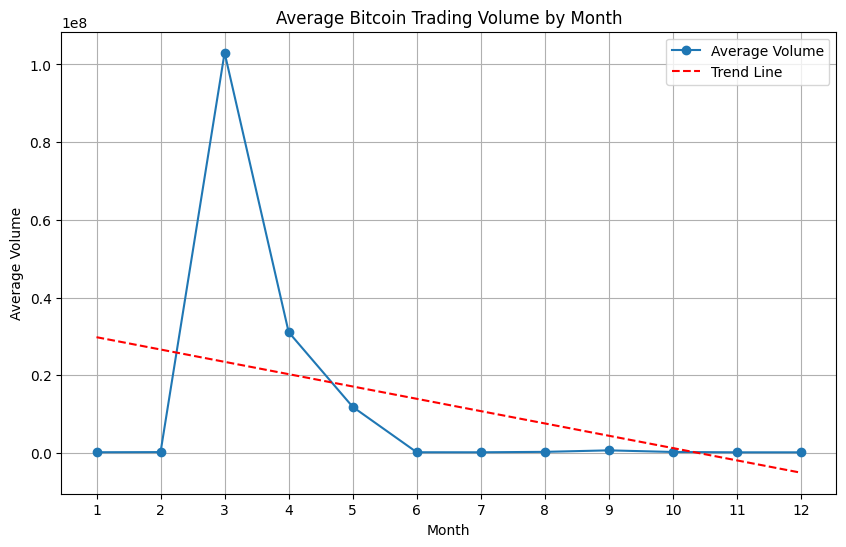

In [ ]:
#Average Bitcoin Trading Volume by Month

y_filtered = y_avg[['Date', 'Vol.']]
y_filtered['Month'] = y_filtered['Date'].dt.month
monthly_avg = y_filtered.groupby('Month')['Vol.'].mean().reset_index()
print(monthly_avg)

plt.figure(figsize=(10, 6))
plt.plot(monthly_avg['Month'], monthly_avg['Vol.'], marker='o', linestyle='-', label='Average Volume')

# Add a trend line
z = np.polyfit(monthly_avg['Month'], monthly_avg['Vol.'], 1)
p = np.poly1d(z)
plt.plot(monthly_avg['Month'], p(monthly_avg['Month']), "r--", label='Trend Line')
plt.title('Average Bitcoin Trading Volume by Month')
plt.xlabel('Month')
plt.ylabel('Average Volume')
plt.xticks(range(1, 13))
plt.grid(True)
plt.legend()
plt.show()

### **1.4. Filtering Data.  Add data lower bound: Keep data from 2011 onwards**

In [ ]:
df = df[df['Date'] >= '2011-01-01']
df.head()

,Date,Price,Open,High,Low,Vol.,Change %
167,2011-01-01,0.3,0.3,0.3,0.3,2820.0,0.00
168,2011-01-02,0.3,0.3,0.3,0.3,5350.0,0.00
169,2011-01-03,0.3,0.3,0.3,0.3,1430.0,0.00
170,2011-01-04,0.3,0.3,0.3,0.3,1880.0,0.00
171,2011-01-05,0.3,0.3,0.3,0.3,360.0,0.00


### **1.5.  Convert columns to numeric**

In [ ]:
for col in ['Price', 'Open', 'High', 'Low', 'Change %']:
    df[col] = pd.to_numeric(df[col])
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4832 entries, 167 to 4998
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   Date      4832 non-null   datetime64[ns]
 1   Price     4832 non-null   float64       
 2   Open      4832 non-null   float64       
 3   High      4832 non-null   float64       
 4   Low       4832 non-null   float64       
 5   Vol.      4832 non-null   float64       
 6   Change %  4832 non-null   float64       
dtypes: datetime64[ns](1), float64(6)
memory usage: 302.0 KB


### **1.6. Remove any duplicate values if exisists**

In [ ]:
print( "shape before remove duplicates:", df.shape)
df.drop_duplicates(inplace=True)
print( "shape after remove duplicates:", df.shape)

shape before remove duplicates: (4832, 7)
shape after remove duplicates: (4832, 7)


# Stage 2: Feature Engineering

### 1.6 Adding day of week , months columns to indicate day of the week and month of theyear

In [ ]:
import pandas as pd
import numpy as np

# Assuming your DataFrame is named 'df'
# Adding 'Day of Week' indicator column (0=Monday, 6=Sunday)
df['Day_of_Week'] = df['Date'].dt.dayofweek

# Adding 'Month' indicator column (1=January, 12=December)
df['Month'] = df['Date'].dt.month




### 1.6.1 Adding indicators values to the model

In [ ]:

# Adding 7-day exponential moving average (EMA) for 'Price'
df['7_day_EMA'] = df['Price'].ewm(span=7, adjust=False).mean()

# Calculating Ichimoku Cloud lines
# Conversion Line (Tenkan-sen): (9-period high + 9-period low) / 2
df['9_high'] = df['High'].rolling(window=9).max()
df['9_low'] = df['Low'].rolling(window=9).min()
df['Tenkan_sen'] = (df['9_high'] + df['9_low']) / 2

# Base Line (Kijun-sen): (26-period high + 26-period low) / 2
df['26_high'] = df['High'].rolling(window=26).max()
df['26_low'] = df['Low'].rolling(window=26).min()
df['Kijun_sen'] = (df['26_high'] + df['26_low']) / 2

# Leading Span A (Senkou Span A): (Conversion Line + Base Line) / 2 shifted 26 periods ahead
df['Senkou_Span_A'] = ((df['Tenkan_sen'] + df['Kijun_sen']) / 2).shift(26)

# Leading Span B (Senkou Span B): (52-period high + 52-period low) / 2 shifted 26 periods ahead
df['52_high'] = df['High'].rolling(window=52).max()
df['52_low'] = df['Low'].rolling(window=52).min()
df['Senkou_Span_B'] = ((df['52_high'] + df['52_low']) / 2).shift(26)

# Lagging Span (Chikou Span): 'Price' shifted 26 periods back
df['Chikou_Span'] = df['Price'].shift(-26)

# Dropping intermediate calculation columns
df.drop(columns=['9_high', '9_low', '26_high', '26_low', '52_high', '52_low'], inplace=True)

df.dropna(inplace =True)

# Display the first few rows of the updated DataFrame
df.head()

,Date,Price,Open,High,Low,Vol.,Change %,Day_of_Week,Month,7_day_EMA,Tenkan_sen,Kijun_sen,Senkou_Span_A,Senkou_Span_B,Chikou_Span
244,2011-03-19,0.8,0.8,0.8,0.7,9880.0,-6.31,5,3,0.842286,0.8,0.85,0.850,0.7,1.0
245,2011-03-20,0.7,0.8,0.8,0.7,5820.0,0.00,6,3,0.806714,0.8,0.85,0.850,0.7,1.0
246,2011-03-21,0.8,0.7,0.8,0.7,3700.0,0.00,0,3,0.805036,0.8,0.85,0.850,0.7,1.0
247,2011-03-22,0.8,0.8,0.8,0.7,12150.0,6.59,1,3,0.803777,0.8,0.85,0.825,0.7,1.1
248,2011-03-23,0.8,0.8,0.9,0.8,13260.0,0.00,2,3,0.802833,0.8,0.85,0.850,0.7,1.2


### **1.7. Adding Lag Features**

In [ ]:
# Add lag variables for all columns
# Assuming your DataFrame is named df
df.set_index('Date', inplace=True)
for col in df.columns:
    for lag in range(1, 8):
        df[f'{col}_lag{lag}'] = df[col].shift(lag)

# Remove any null values
df.dropna(inplace=True)

df.head()


,Price,Open,High,Low,Vol.,Change %,Day_of_Week,Month,7_day_EMA,Tenkan_sen,...,Senkou_Span_B_lag5,Senkou_Span_B_lag6,Senkou_Span_B_lag7,Chikou_Span_lag1,Chikou_Span_lag2,Chikou_Span_lag3,Chikou_Span_lag4,Chikou_Span_lag5,Chikou_Span_lag6,Chikou_Span_lag7
Date,,,,,,,,,,,,,,,,,,,,,
2011-03-26,0.9,0.9,0.9,0.8,11760.0,0.0,5,3,0.859008,0.8,...,0.7,0.7,0.7,1.1,1.2,1.2,1.1,1.0,1.0,1.0
2011-03-27,0.8,0.9,0.9,0.8,5340.0,0.0,6,3,0.844256,0.8,...,0.7,0.7,0.7,1.2,1.1,1.2,1.2,1.1,1.0,1.0
2011-03-28,0.8,0.8,0.9,0.8,12570.0,0.0,0,3,0.833192,0.8,...,0.7,0.7,0.7,1.4,1.2,1.1,1.2,1.2,1.1,1.0
2011-03-29,0.8,0.8,0.8,0.8,4220.0,0.0,1,3,0.824894,0.8,...,0.7,0.7,0.7,1.7,1.4,1.2,1.1,1.2,1.2,1.1
2011-03-30,0.8,0.8,0.8,0.8,3220.0,0.0,2,3,0.818670,0.8,...,0.7,0.7,0.7,1.6,1.7,1.4,1.2,1.1,1.2,1.2


### **8. Creating Target Variable**

In [ ]:
#Shifting the 'Price' column to create 'Tomorrow_Price'
df['Tomorrow_Price'] = df['Price'].shift(-1)
df.dropna(inplace=True)
df.head()

,Price,Open,High,Low,Vol.,Change %,Day_of_Week,Month,7_day_EMA,Tenkan_sen,...,Senkou_Span_B_lag6,Senkou_Span_B_lag7,Chikou_Span_lag1,Chikou_Span_lag2,Chikou_Span_lag3,Chikou_Span_lag4,Chikou_Span_lag5,Chikou_Span_lag6,Chikou_Span_lag7,Tomorrow_Price
Date,,,,,,,,,,,,,,,,,,,,,
2011-03-26,0.9,0.9,0.9,0.8,11760.0,0.0,5,3,0.859008,0.8,...,0.7,0.7,1.1,1.2,1.2,1.1,1.0,1.0,1.0,0.8
2011-03-27,0.8,0.9,0.9,0.8,5340.0,0.0,6,3,0.844256,0.8,...,0.7,0.7,1.2,1.1,1.2,1.2,1.1,1.0,1.0,0.8
2011-03-28,0.8,0.8,0.9,0.8,12570.0,0.0,0,3,0.833192,0.8,...,0.7,0.7,1.4,1.2,1.1,1.2,1.2,1.1,1.0,0.8
2011-03-29,0.8,0.8,0.8,0.8,4220.0,0.0,1,3,0.824894,0.8,...,0.7,0.7,1.7,1.4,1.2,1.1,1.2,1.2,1.1,0.8
2011-03-30,0.8,0.8,0.8,0.8,3220.0,0.0,2,3,0.818670,0.8,...,0.7,0.7,1.6,1.7,1.4,1.2,1.1,1.2,1.2,0.8


In [ ]:
# Split the dataset: last 365 rows for testing, rest for training
train_df = df.iloc[:-365]
test_df = df.iloc[-365:]

# Print the shapes of the resulting DataFrames
print("Training set shape:", train_df.shape)
print("Testing set shape:", test_df.shape)

Training set shape: (4356, 113)
Testing set shape: (365, 113)


# Stage 03 : Model building & Model Evaluation

In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dropout, Dense, Input
from tensorflow.keras.callbacks import EarlyStopping


In [ ]:
# Model building
X_train = train_df.drop(['Tomorrow_Price'], axis=1).values
test_df_features = test_df.drop([ 'Tomorrow_Price'], axis=1).values

y_train = train_df['Tomorrow_Price'].values
X_train = X_train.reshape((X_train.shape[0], 1, X_train.shape[1]))


In [ ]:
# Scale down X_train and y_train separately
X_scaler = MinMaxScaler()
y_scaler = MinMaxScaler()
X_train_scaled = X_scaler.fit_transform(X_train.reshape(-1, X_train.shape[2])).reshape(X_train.shape)
test_df_features_scaled = X_scaler.transform(test_df_features.reshape(-1, test_df_features.shape[1])).reshape(test_df_features.shape)
y_train_scaled = y_scaler.fit_transform(y_train.reshape(-1, 1)).flatten()

Defining Functions to Evaluate Model

In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_error

# Define functions to evaluate and simulate trading strategy
def evaluate_model(actual_prices, predictions):
    mse = mean_squared_error(actual_prices, predictions)
    mae = mean_absolute_error(actual_prices, predictions)

    returns = (predictions[1:] - predictions[:-1]) / predictions[:-1]
    sharpe_ratio = returns.mean() / returns.std()
    total_return = (predictions[-1] - predictions[0]) / predictions[0]
    std_returns = returns.std()

    return mse, mae, sharpe_ratio, total_return, std_returns

def simulate_trading_strategy(actual_prices, predictions):
    initial_balance = 10000
    balance = initial_balance
    position = 0

    for i in range(1, len(predictions)):
        if predictions[i] > actual_prices[i-1]:
            if position == 0:
                position = balance / actual_prices[i-1]
                balance = 0
        elif predictions[i] < actual_prices[i-1]:
            if position > 0:
                balance = position * actual_prices[i-1]
                position = 0

    if position > 0:
        balance = position * actual_prices[-1]

    return (balance - initial_balance) / initial_balance


In [ ]:
# Store results
results = {
    "Model": [],
    "MSE": [],
    "MAE": [],
    "Sharpe Ratio": [],
    "Total Return": [],
    "Std of Returns": [],
    "Trading Return": []
}

# LSTM Model 01 : simple architecture

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dropout, Dense, Input
from tensorflow.keras.callbacks import EarlyStopping
import tensorflow as tf

# Build the LSTM model without regularization
model = Sequential()
model.add(Input(shape=(X_train.shape[1], X_train.shape[2])))
model.add(LSTM(1000, return_sequences=True))
model.add(LSTM(500, return_sequences=False))
model.add(Dropout(0.2))
model.add(Dense(250))
model.add(Dense(50))
model.add(Dense(8))
model.add(Dense(1))

# Compile the model
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=1e-4), loss='mean_squared_error')

# Define early stopping callback
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

# Train the model with early stopping
history = model.fit(X_train_scaled, y_train_scaled,
                    batch_size=8,
                    epochs=200,
                    validation_split=0.2,
                    callbacks=[early_stopping])


Epoch 1/200
436/436 [==============================] - 55s 113ms/step - loss: 2.0350e-04 - val_loss: 0.0015
Epoch 2/200
436/436 [==============================] - 45s 103ms/step - loss: 6.3344e-05 - val_loss: 0.0014
Epoch 3/200
436/436 [==============================] - 41s 95ms/step - loss: 5.8589e-05 - val_loss: 0.0020
Epoch 4/200
436/436 [==============================] - 44s 102ms/step - loss: 5.2292e-05 - val_loss: 0.0013
Epoch 5/200
436/436 [==============================] - 45s 103ms/step - loss: 4.4086e-05 - val_loss: 0.0021
Epoch 6/200
436/436 [==============================] - 42s 96ms/step - loss: 4.4216e-05 - val_loss: 0.0020
Epoch 7/200
436/436 [==============================] - 42s 96ms/step - loss: 3.8441e-05 - val_loss: 0.0010
Epoch 8/200
436/436 [==============================] - 47s 109ms/step - loss: 3.9411e-05 - val_loss: 0.0028
Epoch 9/200
436/436 [==============================] - 49s 112ms/step - loss: 4.1156e-05 - val_loss: 8.3572e-04
Epoch 10/200
436/436 [=====

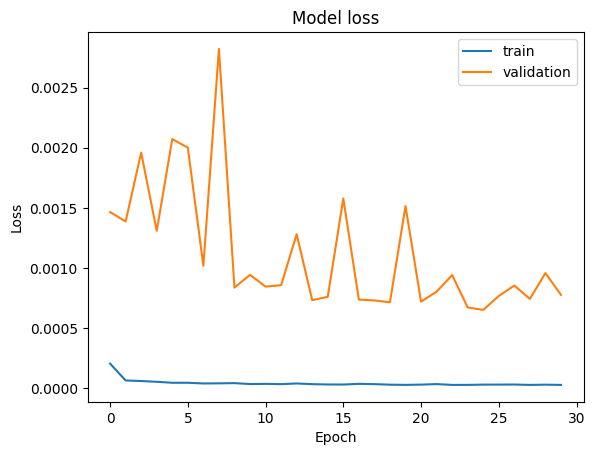

In [ ]:
# Display training history
import matplotlib.pyplot as plt

plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='validation')
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(loc='upper right')
plt.show()

12/12 [==============================] - 1s 17ms/step


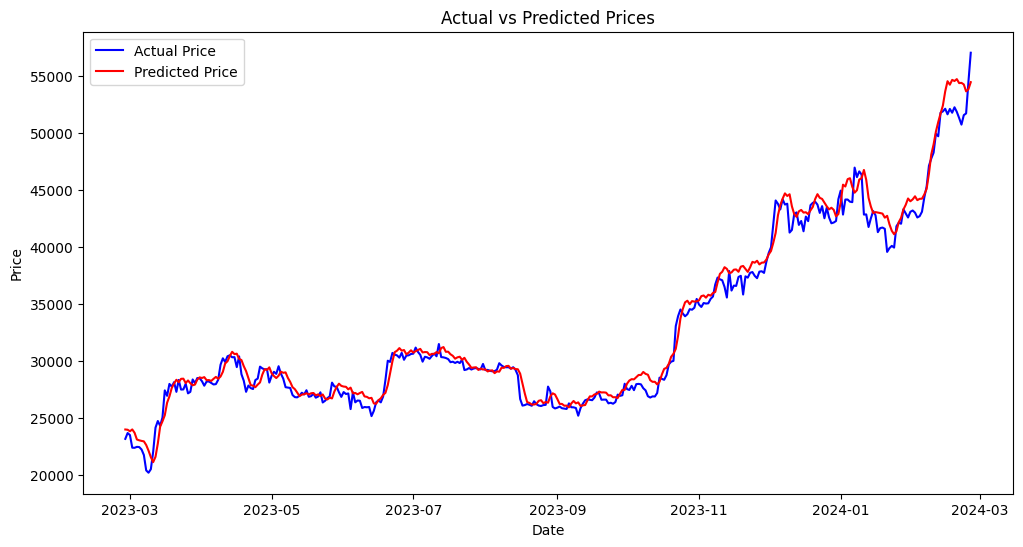

In [ ]:
predictions_scaled = model.predict(test_df_features_scaled.reshape(-1, 1, test_df_features_scaled.shape[1]))

# Inverse transform the predictions
predictions = y_scaler.inverse_transform(predictions_scaled).flatten()

# Plotting the test data and predictions
plt.figure(figsize=(12, 6))
test_df.reset_index(inplace=True)
plt.plot(test_df['Date'], test_df['Tomorrow_Price'], label='Actual Price', color='blue')
plt.plot(test_df['Date'], predictions, label='Predicted Price', color='red')
plt.xlabel('Date')
plt.ylabel('Price')
plt.title('Actual vs Predicted Prices')
plt.legend()
plt.show()

In [ ]:
# Evaluate LSTM model 1
lstm_mse, lstm_mae, lstm_sharpe_ratio, lstm_total_return, lstm_std_returns = evaluate_model(test_df['Tomorrow_Price'], predictions)
lstm_trading_return = simulate_trading_strategy(test_df['Tomorrow_Price'].values, predictions).flatten()

results["Model"].append("LSTM Model 1")
results["MSE"].append(lstm_mse)
results["MAE"].append(lstm_mae)
results["Sharpe Ratio"].append(lstm_sharpe_ratio)
results["Total Return"].append(lstm_total_return)
results["Std of Returns"].append(lstm_std_returns)
results["Trading Return"].append(lstm_trading_return)

# LSTM Model 2 : with Bidirectional LSTM layers

With a learning rate and increased patience

In [ ]:
import tensorflow as tf
from tensorflow.keras.layers import Input, LSTM, Bidirectional, Dense, Dropout
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers.schedules import ExponentialDecay
from tensorflow.keras.callbacks import EarlyStopping

# Build the LSTM model
model = Sequential()
model.add(Input(shape=(X_train_scaled.shape[1], X_train_scaled.shape[2])))
model.add(Bidirectional(LSTM(5000, return_sequences=True)))
model.add(Bidirectional(LSTM(500, return_sequences=False)))
model.add(Dropout(0.2))
model.add(Dense(250, activation='relu'))
model.add(Dense(50, activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(1))

# Define learning rate schedule
initial_learning_rate = 1e-4
lr_schedule = ExponentialDecay(
    initial_learning_rate,
    decay_steps=10000,
    decay_rate=0.96,
    staircase=True
)

# Compile the model with learning rate schedule
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=lr_schedule), loss='mean_squared_error')

# Define early stopping callback
early_stopping = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)

# Train the model with early stopping and learning rate scheduler
history = model.fit(X_train_scaled, y_train_scaled,
                    batch_size=8,
                    epochs=200,
                    validation_split=0.2,
                    callbacks=[early_stopping])


Epoch 1/200
436/436 [==============================] - 2007s 5s/step - loss: 1.8983e-04 - val_loss: 0.0021
Epoch 2/200
436/436 [==============================] - 1994s 5s/step - loss: 6.0963e-05 - val_loss: 0.0016
Epoch 3/200
436/436 [==============================] - 1990s 5s/step - loss: 5.5336e-05 - val_loss: 0.0030
Epoch 4/200
436/436 [==============================] - 2310s 5s/step - loss: 4.9079e-05 - val_loss: 0.0033
Epoch 5/200
436/436 [==============================] - 2211s 5s/step - loss: 4.4391e-05 - val_loss: 0.0062


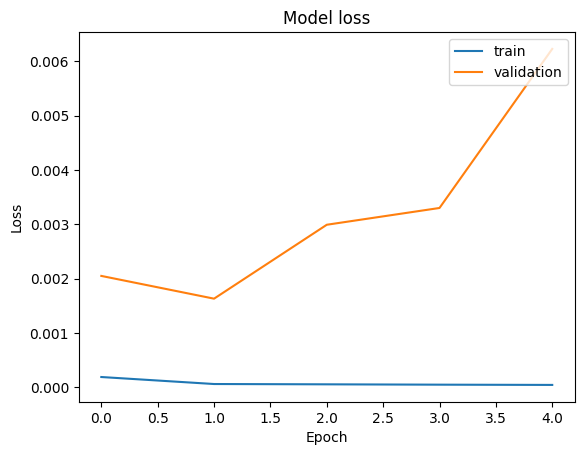

In [ ]:
# Display training history
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='validation')
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(loc='upper right')
plt.show()

12/12 [==============================] - 7s 423ms/step


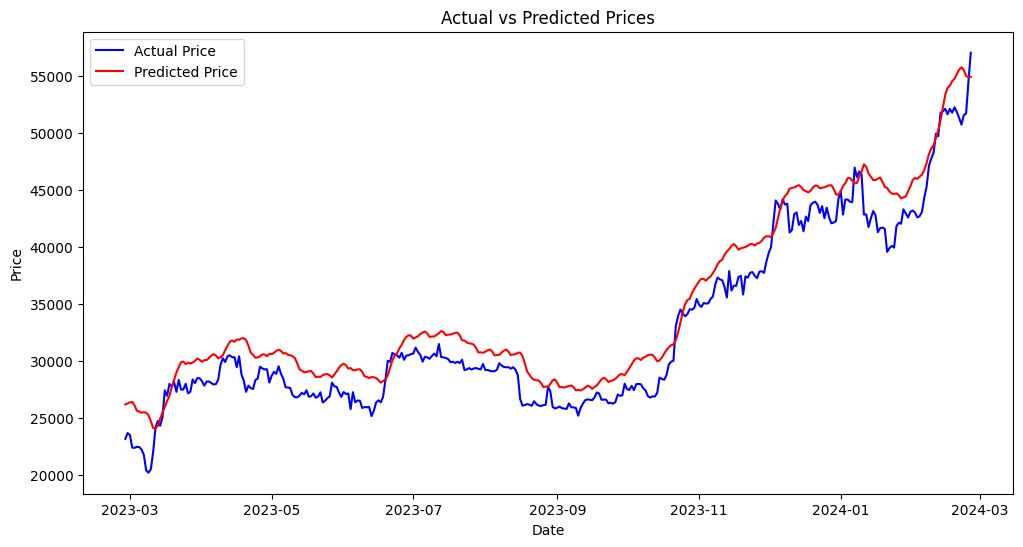

In [ ]:
predictions_scaled = model.predict(test_df_features_scaled.reshape(-1, 1, test_df_features_scaled.shape[1]))

# Inverse transform the predictions
predictions = y_scaler.inverse_transform(predictions_scaled).flatten()

# Plotting the test data and predictions
plt.figure(figsize=(12, 6))
plt.plot(test_df['Date'], test_df['Tomorrow_Price'], label='Actual Price', color='blue')
plt.plot(test_df['Date'], predictions, label='Predicted Price', color='red')
plt.xlabel('Date')
plt.ylabel('Price')
plt.title('Actual vs Predicted Prices')
plt.legend()
plt.show()

In [ ]:
# Evaluate LSTM model 2
lstm_mse, lstm_mae, lstm_sharpe_ratio, lstm_total_return, lstm_std_returns = evaluate_model(test_df['Tomorrow_Price'], predictions)
lstm_trading_return = simulate_trading_strategy(test_df['Tomorrow_Price'].values, predictions).flatten()

results["Model"].append("LSTM Model 2")
results["MSE"].append(lstm_mse)
results["MAE"].append(lstm_mae)
results["Sharpe Ratio"].append(lstm_sharpe_ratio)
results["Total Return"].append(lstm_total_return)
results["Std of Returns"].append(lstm_std_returns)
results["Trading Return"].append(lstm_trading_return)

# LSTM Model 3 : with batch normalization and L2 regularization

In [ ]:
from tensorflow.keras.regularizers import l2

In [ ]:
import tensorflow as tf
from tensorflow.keras.layers import Input, LSTM, Bidirectional, Dense, Dropout, BatchNormalization
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers.schedules import ExponentialDecay
from tensorflow.keras.callbacks import EarlyStopping

# Build the LSTM model
model = Sequential()
model.add(Input(shape=(X_train_scaled.shape[1], X_train_scaled.shape[2])))
model.add(Bidirectional(LSTM(5000, return_sequences=True)))
model.add(BatchNormalization())
model.add(Bidirectional(LSTM(500, return_sequences=False)))
model.add(BatchNormalization())
model.add(Dropout(0.2))
model.add(Dense(250, activation='relu', kernel_regularizer=tf.keras.regularizers.l2(0.01)))
model.add(BatchNormalization())
model.add(Dense(50, activation='relu', kernel_regularizer=tf.keras.regularizers.l2(0.01)))
model.add(BatchNormalization())
model.add(Dense(8, activation='relu', kernel_regularizer=tf.keras.regularizers.l2(0.01)))
model.add(BatchNormalization())
model.add(Dense(1))

# Define learning rate schedule
initial_learning_rate = 1e-4
lr_schedule = ExponentialDecay(
    initial_learning_rate,
    decay_steps=10000,
    decay_rate=0.96,
    staircase=True
)

# Compile the model with learning rate schedule
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=lr_schedule), loss='mean_squared_error')

# Define early stopping callback
early_stopping = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)

# Train the model with early stopping and learning rate scheduler
history = model.fit(X_train_scaled, y_train_scaled,
                    batch_size=8,
                    epochs=200,
                    validation_split=0.2,
                    callbacks=[early_stopping])


Epoch 1/200
436/436 [==============================] - 1997s 5s/step - loss: 4.6558 - val_loss: 4.3353
Epoch 2/200
436/436 [==============================] - 1968s 5s/step - loss: 3.5300 - val_loss: 2.9769
Epoch 3/200
263/436 [=================>............] - ETA: 12:43 - loss: 2.6381

In [ ]:
# Display training history
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='validation')
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(loc='upper right')
plt.show()

In [ ]:
predictions_scaled = model.predict(test_df_features_scaled.reshape(-1, 1, test_df_features_scaled.shape[1]))

# Inverse transform the predictions
predictions = y_scaler.inverse_transform(predictions_scaled).flatten()

# Plotting the test data and predictions
plt.figure(figsize=(12, 6))
plt.plot(test_df['Date'], test_df['Tomorrow_Price'], label='Actual Price', color='blue')
plt.plot(test_df['Date'], predictions, label='Predicted Price', color='red')
plt.xlabel('Date')
plt.ylabel('Price')
plt.title('Actual vs Predicted Prices')
plt.legend()
plt.show()

In [ ]:
# Evaluate LSTM model 3
lstm_mse, lstm_mae, lstm_sharpe_ratio, lstm_total_return, lstm_std_returns = evaluate_model(test_df['Tomorrow_Price'], predictions)
lstm_trading_return = simulate_trading_strategy(test_df['Tomorrow_Price'], predictions)

# Store results in a dictionary
results = {
    "Model": ["LSTM Model 3"],
    "MSE": [lstm_mse],
    "MAE": [lstm_mae],
    "Sharpe Ratio": [lstm_sharpe_ratio],
    "Total Return": [lstm_total_return],
    "Std of Returns": [lstm_std_returns],
    "Trading Return": [lstm_trading_return]
}


#  Model Selection

In [ ]:
# Convert dictionary to DataFrame
results_df = pd.DataFrame(results)
print(results_df)

# Select best model based on Sharpe Ratio and Trading Return
best_model_idx = results_df[['Sharpe Ratio', 'Trading Return']].idxmax().mean().astype(int)
best_model_name = results_df.iloc[best_model_idx]['Model']

print(f"Selected Best Model: {best_model_name}")

In [ ]:
# Print results
for key, value in results.items():
    print(f"{key}: {value}")
